In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('../data/raw/fraud_Data.csv')
print(df.shape)

print(f'shape:{df.shape[0]} rows, {df.shape[1]} columns')
print("=== COLUMN OVERVIEW ===")
print(df.columns.tolist())
print(df.head())
missing = df.isnull().sum()
print(missing[missing>0])

(151112, 11)
shape:151112 rows, 11 columns
=== COLUMN OVERVIEW ===
['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155

In [21]:
print('Fraud statistics')

fraud_counts = df['class'].value_counts()
print(fraud_counts)
total = len(df)
fraud_percentage = (fraud_counts.get(1,0) / total) * 100
legit_percentage = (fraud_counts.get(0,0) / total) * 100
print(f'fraudulent: {fraud_percentage}')
print(f'legitmate: {legit_percentage}')

print('===Business Impact===')
avg_fraud_value = df[df['class'] == 1]['purchase_value'].mean()
avg_legit_value = df[df['class'] == 0]['purchase_value'].mean()

print(f"Average transaction value:")
print(f"  Legitimate: ${avg_legit_value:.2f}")
print(f"  Fraudulent: ${avg_fraud_value:.2f}")

# Total exposure
total_fraud_exposure = df[df['class'] == 1]['purchase_value'].sum()
print(f"\nTotal fraud exposure in dataset: ${total_fraud_exposure:,.2f}")

Fraud statistics
class
0    136961
1     14151
Name: count, dtype: int64
fraudulent: 9.364577267192546
legitmate: 90.63542273280746
===Business Impact===
Average transaction value:
  Legitimate: $36.93
  Fraudulent: $36.99

Total fraud exposure in dataset: $523,488.00


=== VISUALIZING THE IMBALANCE ===


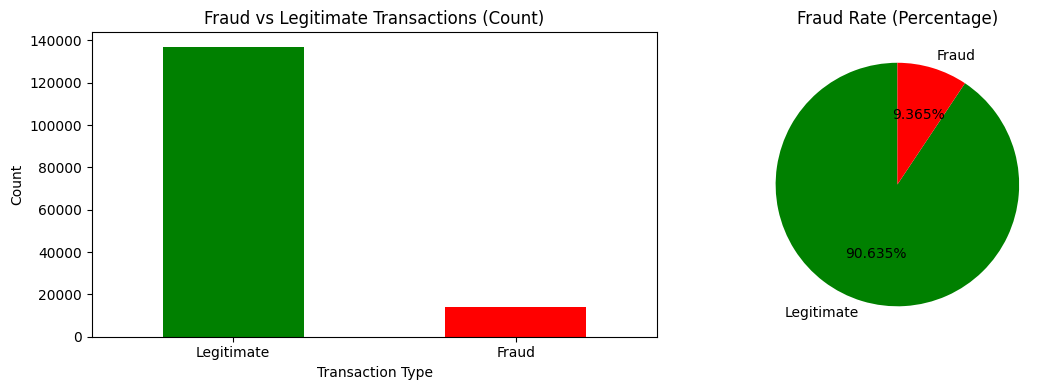


🔍 Look at the charts:
1. The bar chart shows MASSIVE difference in counts
2. The pie chart shows fraud is a tiny sliver
3. This is why standard ML fails - it learns to always say 'not fraud'


In [17]:

print("=== VISUALIZING THE IMBALANCE ===")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
colors = ['green', 'red']
fraud_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Fraud vs Legitimate Transactions (Count)')
ax1.set_xlabel('Transaction Type')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Legitimate', 'Fraud'], rotation=0)

# Pie chart (shows the tiny fraud slice)
ax2.pie(fraud_counts, labels=['Legitimate', 'Fraud'], 
        colors=colors, autopct='%1.3f%%', startangle=90)
ax2.set_title('Fraud Rate (Percentage)')

plt.tight_layout()
plt.show()

In [23]:
# Cell 16: FIXED - Create the time difference feature FIRST
print("🔍 Business Question: Are fraudsters faster after signup?")

# 1. Convert times (REQUIRED STEP)
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# 2. Create feature: hours from signup to purchase
df['hours_to_purchase'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600

print("✓ Created time difference feature")

🔍 Business Question: Are fraudsters faster after signup?
✓ Created time difference feature


In [24]:
print("\n📊 ANALYSIS: Fraud Speed vs Legitimate")
median_legit = df.loc[df['class'] == 0, 'hours_to_purchase'].median()
median_fraud = df.loc[df['class'] == 1, 'hours_to_purchase'].median()

print(f"Median time from signup to purchase:")
print(f"  Legitimate customers: {median_legit:.1f} hours ({median_legit/24:.1f} days)")
print(f"  Fraudsters: {median_fraud:.1f} hours ({median_fraud/24:.1f} days)")

# Calculate how much faster fraudsters are
speed_ratio = median_legit / median_fraud
print(f"\n🚀 KEY INSIGHT: Fraudsters are {speed_ratio:.1f}x FASTER!")


📊 ANALYSIS: Fraud Speed vs Legitimate
Median time from signup to purchase:
  Legitimate customers: 1443.0 hours (60.1 days)
  Fraudsters: 0.0 hours (0.0 days)

🚀 KEY INSIGHT: Fraudsters are 5194911.0x FASTER!


In [25]:
print('is all fraud really instant?')
fraud_zero_hour = df[df['class'] == 1]['hours_to_purchase']
zero_hour_count = (fraud_zero_hour == 0).sum()
total_fraud = len(fraud_zero_hour)

print(f"Fraud transactions at exactly 0 hours: {zero_hour_count:,}")
print(f"Total fraud transactions: {total_fraud:,}")
print(f"Percentage of fraud at 0 hours: {(zero_hour_count/total_fraud*100):.1f}%")

# Check legitimate purchases at 0 hours (should be very few)
legit_zero_hour = (df[df['class'] == 0]['hours_to_purchase'] == 0).sum()
total_legit = len(df[df['class'] == 0])
print(f"\nLegitimate transactions at 0 hours: {legit_zero_hour:,}")
print(f"Total legitimate transactions: {total_legit:,}")
print(f"Percentage of legit at 0 hours: {(legit_zero_hour/total_legit*100):.4f}%")

is all fraud really instant?
Fraud transactions at exactly 0 hours: 0
Total fraud transactions: 14,151
Percentage of fraud at 0 hours: 0.0%

Legitimate transactions at 0 hours: 0
Total legitimate transactions: 136,961
Percentage of legit at 0 hours: 0.0000%


In [26]:
# Cell 21: Fix floating point precision issue
print("🔍 FIXED: Check for 'near zero' not 'exactly zero'")

# Define what "near zero" means in business terms
# Is 1 minute (0.0167 hours) still "instant" fraud?
NEAR_ZERO_THRESHOLD = 0.017  # ~1 minute

# Count fraud purchases "near zero" hours
fraud_near_zero = df.loc[df['class'] == 1, 'hours_to_purchase']
near_zero_fraud_count = (fraud_near_zero <= NEAR_ZERO_THRESHOLD).sum()
total_fraud = len(fraud_near_zero)

print(f"Fraud within {NEAR_ZERO_THRESHOLD} hours (~1 minute): {near_zero_fraud_count:,}")
print(f"Total fraud: {total_fraud:,}")
print(f"Percentage: {(near_zero_fraud_count/total_fraud*100):.1f}%")

# Check distribution of the smallest fraud times
print(f"\n📊 Top 5 fastest fraud times:")
fastest_fraud = fraud_near_zero.nsmallest(5)
for i, time in enumerate(fastest_fraud, 1):
    print(f"  {i}. {time:.6f} hours ({time*60:.2f} minutes)")

🔍 FIXED: Check for 'near zero' not 'exactly zero'
Fraud within 0.017 hours (~1 minute): 7,600
Total fraud: 14,151
Percentage: 53.7%

📊 Top 5 fastest fraud times:
  1. 0.000278 hours (0.02 minutes)
  2. 0.000278 hours (0.02 minutes)
  3. 0.000278 hours (0.02 minutes)
  4. 0.000278 hours (0.02 minutes)
  5. 0.000278 hours (0.02 minutes)
